In [1]:
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:\\Capstone Project\\Raw_Data\\Taxi\\data.csv")
data

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID
0,2019-12-01 00:26:58,2019-12-01 00:41:45,142,116
1,2019-12-01 00:12:08,2019-12-01 00:12:14,145,145
2,2019-12-01 00:25:53,2019-12-01 00:26:04,145,145
3,2019-12-01 00:12:03,2019-12-01 00:33:19,138,25
4,2019-12-01 00:05:27,2019-12-01 00:16:32,161,237
...,...,...,...,...
25420606,2020-06-30 23:03:00,2020-06-30 23:29:00,82,39
25420607,2020-06-30 23:33:00,2020-07-01 00:08:00,20,225
25420608,2020-06-30 23:32:00,2020-06-30 23:55:00,244,212
25420609,2020-06-30 23:17:00,2020-07-01 00:08:00,206,86


In [3]:
print(data[data.isnull().values==True])

Empty DataFrame
Columns: [pickup_datetime, dropoff_datetime, PULocationID, DOLocationID]
Index: []


In [4]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"],format='%Y-%m-%d')
data["dropoff_datetime"] = pd.to_datetime(data["dropoff_datetime"],format='%Y-%m-%d')
data

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID
0,2019-12-01 00:26:58,2019-12-01 00:41:45,142,116
1,2019-12-01 00:12:08,2019-12-01 00:12:14,145,145
2,2019-12-01 00:25:53,2019-12-01 00:26:04,145,145
3,2019-12-01 00:12:03,2019-12-01 00:33:19,138,25
4,2019-12-01 00:05:27,2019-12-01 00:16:32,161,237
...,...,...,...,...
25420606,2020-06-30 23:03:00,2020-06-30 23:29:00,82,39
25420607,2020-06-30 23:33:00,2020-07-01 00:08:00,20,225
25420608,2020-06-30 23:32:00,2020-06-30 23:55:00,244,212
25420609,2020-06-30 23:17:00,2020-07-01 00:08:00,206,86


In [5]:
data["pickup_datetime"] = data["pickup_datetime"].dt.date
data["dropoff_datetime"] = data["dropoff_datetime"].dt.date
data

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID
0,2019-12-01,2019-12-01,142,116
1,2019-12-01,2019-12-01,145,145
2,2019-12-01,2019-12-01,145,145
3,2019-12-01,2019-12-01,138,25
4,2019-12-01,2019-12-01,161,237
...,...,...,...,...
25420606,2020-06-30,2020-06-30,82,39
25420607,2020-06-30,2020-07-01,20,225
25420608,2020-06-30,2020-06-30,244,212
25420609,2020-06-30,2020-07-01,206,86


In [6]:
data = data[(data["pickup_datetime"] >=pd.to_datetime('20191201')) & (data["pickup_datetime"] <= pd.to_datetime('20200630'))]
data = data[(data["dropoff_datetime"] >=pd.to_datetime('20191201')) & (data["dropoff_datetime"] <= pd.to_datetime('20200630'))]
data

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID
0,2019-12-01,2019-12-01,142,116
1,2019-12-01,2019-12-01,145,145
2,2019-12-01,2019-12-01,145,145
3,2019-12-01,2019-12-01,138,25
4,2019-12-01,2019-12-01,161,237
...,...,...,...,...
25420604,2020-06-30,2020-06-30,254,168
25420605,2020-06-30,2020-06-30,35,119
25420606,2020-06-30,2020-06-30,82,39
25420608,2020-06-30,2020-06-30,244,212


In [7]:
day = data.groupby("pickup_datetime").size()
day

pickup_datetime
2019-12-01    193722
2019-12-02    222453
2019-12-03    264440
2019-12-04    266866
2019-12-05    289517
               ...  
2020-06-26     28878
2020-06-27     19018
2020-06-28     16632
2020-06-29     27211
2020-06-30     27451
Length: 213, dtype: int64

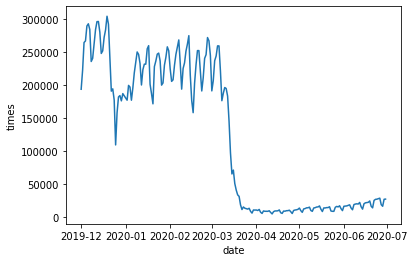

In [8]:
plt.plot(day)
plt.xlabel('date')
plt.ylabel('times')
plt.show()

In [9]:
before = data[(data["pickup_datetime"] >=pd.to_datetime('20191201')) & (data["pickup_datetime"] <= pd.to_datetime('20200314'))]
after = data[(data["pickup_datetime"] >=pd.to_datetime('20200315')) & (data["pickup_datetime"] <= pd.to_datetime('20200630'))]

In [10]:
aftermean = after.groupby("pickup_datetime").size().mean()
aftermean

15944.5

In [11]:
beforemean = before.groupby("pickup_datetime").size().mean()
beforemean

225696.2

In [12]:
beforepickup = before.groupby("PULocationID").size()
beforepickup

PULocationID
1        2617
2          22
3        2112
4       37501
5          95
        ...  
261    126067
262    292780
263    430730
264    155017
265     12408
Length: 261, dtype: int64

In [13]:
afterpickup = after.groupby("PULocationID").size()
afterpickup

PULocationID
1        113
2          4
3        635
4       2121
5         10
       ...  
261     3497
262    25918
263    52659
264    12200
265     2069
Length: 261, dtype: int64

In [14]:
beforedropoff = before.groupby("DOLocationID").size()
beforedropoff

DOLocationID
1       45512
2          52
3        3530
4       93463
5         251
        ...  
261    103422
262    321156
263    450967
264    142137
265     56383
Length: 262, dtype: int64

In [15]:
afterdropoff = after.groupby("DOLocationID").size()
afterdropoff

DOLocationID
1       1448
2         10
3        894
4       8861
5         38
       ...  
261     3471
262    25499
263    42168
264    11464
265     7203
Length: 261, dtype: int64

In [16]:
beforepickup = beforepickup.to_frame().reset_index()
afterpickup = afterpickup.to_frame().reset_index()
beforedropoff = beforedropoff.to_frame().reset_index()
afterdropoff = afterdropoff.to_frame().reset_index()

In [17]:
beforepickup.to_csv(r'E:\\Capstone Project\\Data\\Taxi\\beforepickup.csv',index=True,header = 0, sep=',')
afterpickup.to_csv(r'E:\\Capstone Project\\Data\\Taxi\\afterpickup.csv',index=True,header = 0, sep=',')
beforedropoff.to_csv(r'E:\\Capstone Project\\Data\\Taxi\\beforedropoff.csv',index=True,header = 0, sep=',')
afterdropoff.to_csv(r'E:\\Capstone Project\\Data\\Taxi\\afterdropoff.csv',index=True,header = 0, sep=',')